This file will make a plot of E/N vs N/S, with colour indicating how good the analytic approximation is for the biomass expression. I will do this for both the first and second order approximations.

The equation being approximated is
$$ B = S \int \sum n \varepsilon R$$

and the approximation is
$$ B = 4.17 \frac{E^{4/3}}{S^{1/3} \log(1/\beta)} \left( 1-1.16 \beta^{1/3} \right) $$

Note that at this point, this includes the approximation for the normalization Z, so there are multiple approximations going on here.

Additionally, note that because we want to only have two variables, we are redefining N/S, E/S as just N and E, and B becomes B/S. In this case, the S dependence actually just drops out. So we can pick an S and plot accordingly. 

We here choose $S=50$. Initially, I picked $S=1$, however this doesn't work very well because the sum for the first constraint goes to N, but it is equal to N/S. So we want $S>1$ to make these not the same. So that this error in summation doesn't have a large effect, we need $S$ $\approx$ 30 at the smallest, but closer to $S=50$. Data points with $S$ less than this are marked with an asterix.

In [4]:
import pandas as pd
import numpy as np
import biomass as bm

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read in the data to overlay
data = pd.read_csv('data_statevariables.csv')

In [6]:
# Find max N/S and E/N
print(np.min(data['N']/data['S']),np.max(data['N']/data['S']))
print(np.min(data['E']/data['N']),np.max(data['E']/data['N']))

4.189655172413793 766.5732899022802
4.318977116704805 3262.106995884774


In [7]:
# Define ns and en along with the number in each direction.
# Could also make this higher and then save the grid, but this is OK for now.
num_ns = 40
num_en = 40
# Log spacing since we will use a log log plot
ns = np.logspace(np.log10(4),np.log10(800),num=num_ns)
en = np.logspace(np.log10(4),np.log10(3500),num=num_en)

# Set s also
s0=50 

In [8]:
# Numerical
biomass_num = np.zeros([num_en,num_ns]) 
# First order
biomass_1 = np.zeros([num_en,num_ns]) 
# Second order
biomass_2 = np.zeros([num_en,num_ns])

# This is slow but should be ok just for a plot
for i,e in enumerate(en):
    for j,n in enumerate(ns):
        s = pd.Series([s0,n*s0,e*n*s0],index=['S','N','E'])
        print(n,e) #just to keep track
        biomass_num[i,j] = bm.biomass(s)
        biomass_1[i,j] = bm.biomass_approx(s,order=0)
        biomass_2[i,j] = bm.biomass_approx(s,order=1)

4.0 4.0
4.582059880434849 4.0
5.248818186972653 4.0
6.012599808556044 4.0
6.887523089973725 4.0
7.8897608065343166 4.0
9.037839114462045 4.0
10.35298000305034 4.0
11.859493578730298 4.0
13.585227432343709 4.0
15.562081396081252 4.0
17.82659720526136 4.0
20.42063396472502 4.0
23.392141905702932 4.0
26.796048735890047 4.0
30.695274966724664 4.0
35.161896985986324 4.0
40.278479374867715 4.0
46.139601097126 4.0
52.85360377160216 4.0
60.544594344564594 4.0
69.35473918085798 4.0
79.44689197965802 4.0
91.00760409130808 4.0
104.25057288032023 4.0
119.4205918768162 4.0
136.79807573413575 4.0
156.70424363551794 4.0
179.5070569640486 4.0
205.62802099247492 4.0
235.54997632070865 4.0
269.8260240841243 4.0
309.0897499132784 4.0
354.0669356328183 4.0
405.58897518791133 4.0
464.60824278880324 4.0
532.2156973504775 4.0
609.6610486418193 4.0
698.3758579113801 4.0
800.0000000000003 4.0
4.0 4.758785123385343
4.582059880434849 4.758785123385343
5.248818186972653 4.758785123385343
6.012599808556044 4.75878

13.585227432343709 11.341659764803383
15.562081396081252 11.341659764803383
17.82659720526136 11.341659764803383
20.42063396472502 11.341659764803383
23.392141905702932 11.341659764803383
26.796048735890047 11.341659764803383
30.695274966724664 11.341659764803383
35.161896985986324 11.341659764803383
40.278479374867715 11.341659764803383
46.139601097126 11.341659764803383
52.85360377160216 11.341659764803383
60.544594344564594 11.341659764803383
69.35473918085798 11.341659764803383
79.44689197965802 11.341659764803383
91.00760409130808 11.341659764803383
104.25057288032023 11.341659764803383
119.4205918768162 11.341659764803383
136.79807573413575 11.341659764803383
156.70424363551794 11.341659764803383
179.5070569640486 11.341659764803383
205.62802099247492 11.341659764803383
235.54997632070865 11.341659764803383
269.8260240841243 11.341659764803383
309.0897499132784 11.341659764803383
354.0669356328183 11.341659764803383
405.58897518791133 11.341659764803383
464.60824278880324 11.3416

309.0897499132784 27.030690162587494
354.0669356328183 27.030690162587494
405.58897518791133 27.030690162587494
464.60824278880324 27.030690162587494
532.2156973504775 27.030690162587494
609.6610486418193 27.030690162587494
698.3758579113801 27.030690162587494
800.0000000000003 27.030690162587494
4.0 32.158311555139974
4.582059880434849 32.158311555139974
5.248818186972653 32.158311555139974
6.012599808556044 32.158311555139974
6.887523089973725 32.158311555139974
7.8897608065343166 32.158311555139974
9.037839114462045 32.158311555139974
10.35298000305034 32.158311555139974
11.859493578730298 32.158311555139974
13.585227432343709 32.158311555139974
15.562081396081252 32.158311555139974
17.82659720526136 32.158311555139974
20.42063396472502 32.158311555139974
23.392141905702932 32.158311555139974
26.796048735890047 32.158311555139974
30.695274966724664 32.158311555139974
35.161896985986324 32.158311555139974
40.278479374867715 32.158311555139974
46.139601097126 32.158311555139974
52.853

52.85360377160216 76.64322275797132
60.544594344564594 76.64322275797132
69.35473918085798 76.64322275797132
79.44689197965802 76.64322275797132
91.00760409130808 76.64322275797132
104.25057288032023 76.64322275797132
119.4205918768162 76.64322275797132
136.79807573413575 76.64322275797132
156.70424363551794 76.64322275797132
179.5070569640486 76.64322275797132
205.62802099247492 76.64322275797132
235.54997632070865 76.64322275797132
269.8260240841243 76.64322275797132
309.0897499132784 76.64322275797132
354.0669356328183 76.64322275797132
405.58897518791133 76.64322275797132
464.60824278880324 76.64322275797132
532.2156973504775 76.64322275797132
609.6610486418193 76.64322275797132
698.3758579113801 76.64322275797132
800.0000000000003 76.64322275797132
4.0 91.18215706723572
4.582059880434849 91.18215706723572
5.248818186972653 91.18215706723572
6.012599808556044 91.18215706723572
6.887523089973725 91.18215706723572
7.8897608065343166 91.18215706723572
9.037839114462045 91.182157067235

6.887523089973725 217.31533894973643
7.8897608065343166 217.31533894973643
9.037839114462045 217.31533894973643
10.35298000305034 217.31533894973643
11.859493578730298 217.31533894973643
13.585227432343709 217.31533894973643
15.562081396081252 217.31533894973643
17.82659720526136 217.31533894973643
20.42063396472502 217.31533894973643
23.392141905702932 217.31533894973643
26.796048735890047 217.31533894973643
30.695274966724664 217.31533894973643
35.161896985986324 217.31533894973643
40.278479374867715 217.31533894973643
46.139601097126 217.31533894973643
52.85360377160216 217.31533894973643
60.544594344564594 217.31533894973643
69.35473918085798 217.31533894973643
79.44689197965802 217.31533894973643
91.00760409130808 217.31533894973643
104.25057288032023 217.31533894973643
119.4205918768162 217.31533894973643
136.79807573413575 217.31533894973643
156.70424363551794 217.31533894973643
179.5070569640486 217.31533894973643
205.62802099247492 217.31533894973643
235.54997632070865 217.315

309.0897499132784 517.9298018582242
354.0669356328183 517.9298018582242
405.58897518791133 517.9298018582242
464.60824278880324 517.9298018582242
532.2156973504775 517.9298018582242
609.6610486418193 517.9298018582242
698.3758579113801 517.9298018582242
800.0000000000003 517.9298018582242
4.0 616.179159010209
4.582059880434849 616.179159010209
5.248818186972653 616.179159010209
6.012599808556044 616.179159010209
6.887523089973725 616.179159010209
7.8897608065343166 616.179159010209
9.037839114462045 616.179159010209
10.35298000305034 616.179159010209
11.859493578730298 616.179159010209
13.585227432343709 616.179159010209
15.562081396081252 616.179159010209
17.82659720526136 616.179159010209
20.42063396472502 616.179159010209
23.392141905702932 616.179159010209
26.796048735890047 616.179159010209
30.695274966724664 616.179159010209
35.161896985986324 616.179159010209
40.278479374867715 616.179159010209
46.139601097126 616.179159010209
52.85360377160216 616.179159010209
60.54459434456459

69.35473918085798 1468.5458986820029
79.44689197965802 1468.5458986820029
91.00760409130808 1468.5458986820029
104.25057288032023 1468.5458986820029
119.4205918768162 1468.5458986820029
136.79807573413575 1468.5458986820029
156.70424363551794 1468.5458986820029
179.5070569640486 1468.5458986820029
205.62802099247492 1468.5458986820029
235.54997632070865 1468.5458986820029
269.8260240841243 1468.5458986820029
309.0897499132784 1468.5458986820029
354.0669356328183 1468.5458986820029
405.58897518791133 1468.5458986820029
464.60824278880324 1468.5458986820029
532.2156973504775 1468.5458986820029
609.6610486418193 1468.5458986820029
698.3758579113801 1468.5458986820029
800.0000000000003 1468.5458986820029
4.0 1747.1235939141188
4.582059880434849 1747.1235939141188
5.248818186972653 1747.1235939141188
6.012599808556044 1747.1235939141188
6.887523089973725 1747.1235939141188
7.8897608065343166 1747.1235939141188
9.037839114462045 1747.1235939141188
10.35298000305034 1747.1235939141188
11.8594

In [9]:
# Get percent differences. Note that in doing this, the S dependence drops out. Since really we care about B/S
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

In [10]:
# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

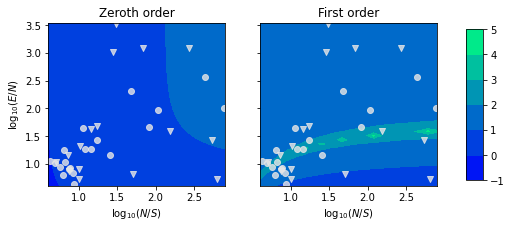

In [11]:
# Plotting
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(np.log10(ns),np.log10(en),z_bm1,contour,cmap='winter')
im2 = axs[1].contourf(np.log10(ns),np.log10(en),z_bm2,contour,cmap='winter')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(np.log10(data[ind_st]['N']/data[ind_st]['S']),np.log10(data[ind_st]['E']/data[ind_st]['N']),
               c='0.9',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(np.log10(data[~ind_st]['N']/data[~ind_st]['S']),np.log10(data[~ind_st]['E']/data[~ind_st]['N']),
               marker='v',c='0.9',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/N)$')
for ax in axs:
    ax.set_xlabel(r'$\log_{10}(N/S)$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

# Save this as just logcontours.pdf to differentiate it from the other files. 
# It should be the same as some of the other figures though.
fig.savefig('Figures/FigS1.pdf',bbox_inches='tight')